cdflibの説明書
https://cdflib.readthedocs.io/en/latest/introduction.html
akebono cdfについて\
分かったこと\
・Epochはある基準時刻からの経過時間を記録したもの\
・cdflib.cdfepoch.breakdown(epoch, True or False)  #True だとndarray, False だとlistで返す\
・↑のやつで[year, month, day, hour, minute, socond, milisecond]がたくさん入ったListを作れる\
・E, BはdBで入っていると思われる。(DARTSにあったときはそうだった)\
　The intensities are described in [dB] (0<I<254) where
  0[dB]=10^-6[mV/m] for E-field and 0[dB] = 10^-6[pT] for B-field.\
・MCAのinput の最大は1 Vrms\
分からないこと\
・Eaveの平均の仕方は？　Emaxはどの幅の最大？\


データダウンロードからtplot変数にするまでできれば、tplotが使える


In [1]:
import cdflib
cdf_file = cdflib.CDF('ak_h1_mca_19890607_v02.cdf')

In [5]:
cdf_file.varget('PostGap')

array([2, 0, 0, ..., 1, 1, 1], dtype=uint32)

In [15]:
cdf_file.attinq('VAR_NOTE')

{'scope': 2,
 'next_adr_location': 13998,
 'attribute_number': 39,
 'num_gr_entry': 0,
 'max_gr_entry': -1,
 'num_z_entry': 5,
 'max_z_entry': 4,
 'first_z_entry': 13601,
 'first_gr_entry': 0,
 'name': 'VAR_NOTE'}

In [2]:
cdf_file.cdf_info()

{'CDF': PosixPath('/home/www/Document/Akebono_analysis/Akebono_analysis/VLF_mca_cdf/ak_h1_mca_19890607_v02.cdf'),
 'Version': '2.7.2',
 'Encoding': 6,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['Emax', 'Eave', 'Bmax', 'Bave', 'PostGap', 'Epoch', 'channel'],
 'Attributes': [{'Acknowledgement': 'Global'},
  {'ADID_ref': 'Global'},
  {'Data_type': 'Global'},
  {'Data_version': 'Global'},
  {'Descriptor': 'Global'},
  {'Discipline': 'Global'},
  {'Generated_by': 'Global'},
  {'Generation_date': 'Global'},
  {'Instrument_type': 'Global'},
  {'Logical_file_id': 'Global'},
  {'Logical_source': 'Global'},
  {'Logical_source_description': 'Global'},
  {'Mission_group': 'Global'},
  {'MODS': 'Global'},
  {'PI_affiliation': 'Global'},
  {'PI_name': 'Global'},
  {'Project': 'Global'},
  {'Rules_of_use': 'Global'},
  {'source_name': 'Global'},
  {'TEXT': 'Global'},
  {'Time_resolution': 'Global'},
  {'TITLE': 'Global'},
  {'Start_time': 'Global'},
  {'End_time': 'Global'},
  {'AVG

In [54]:
cdf_file.globalattsget()

{'Acknowledgement': 'AKEBONO VLF-MCA data were provided by Akebono VLF team through the data archive system at Kanazawa University in Japan.',
 'ADID_ref': 'NSSD0241 ',
 'Data_type': 'H1 > High Resolution data',
 'Data_version': '2',
 'Descriptor': 'MCA > multi channel analyzer',
 'Discipline': 'Space Physics > Magnetospheric Science',
 'Generated_by': 'KANAZAWA University',
 'Generation_date': '20140529',
 'Instrument_type': 'Radio and Plasma Waves(space)',
 'Logical_file_id': 'AK_H1_MCA_19900211_V02',
 'Logical_source': 'AK_H1_MCA',
 'Logical_source_description': 'Akebono Radio and Plasma Waves High Resolution data',
 'Mission_group': 'Akebono',
 'MODS': ' ',
 'PI_affiliation': 'KANAZAWA University',
 'PI_name': 'I. Nagano',
 'Project': ' ',
 'Rules_of_use': ' In order to confirm the reliability of the data, you are requested to contact the VLF PI, Prof. Isamu Nagano before using the VLF-MCA data in oral/poster presentations. In the publishment, you should contact to the VLF PI and c

In [9]:
cdf_file.varattsget('AVG_TYPE')

ValueError: No variable by this name: AVG_TYPE

In [12]:
#実時間に直す部分
epoch = cdf_file.varget('Epoch')
test_breakdown = cdflib.cdfepoch.breakdown(epoch,False)

for i in range(len(test_breakdown)):
    del test_breakdown[i][0:3]
    test_breakdown[i].pop()
    test_breakdown[i] = " ".join(map(str, test_breakdown[i]))
test_breakdown[0:10]

['0 0 4',
 '0 0 12',
 '0 0 20',
 '0 0 28',
 '0 0 36',
 '0 0 44',
 '0 0 52',
 '0 1 0',
 '0 1 8',
 '0 1 16']

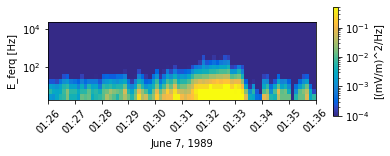

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import Normalize 
from datetime import datetime
from matplotlib.colors import LogNorm 
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

start_time, end_time = [1, 26, 0], [1, 36, 0] # hour, minute, second

start_time, end_time = (3600*start_time[0] + 60*start_time[1] + start_time[2])//8, (3600*end_time[0] + 60*end_time[1] + end_time[2])//8

epoch = cdf_file.varget('Epoch')
time = cdflib.cdfepoch.breakdown(epoch,False) #list

E0 = 1e-6

bandwidth = np.array([0.94, 1.66, 3, 5.4, 9.4, 16.6, 30, 54, 94, 166, 300, 540, 940, 1660, 3000, 5400])
Intensity_of_Eave = cdf_file.varget('Eave')[start_time:end_time]
Intensity_of_Eave = (10**(Intensity_of_Eave/10)) * (E0**2) /bandwidth
Intensity_of_Eave = np.fliplr(Intensity_of_Eave)

for i in range(len(time)):
    time[i].pop()
    time[i] = "/".join(map(str, time[i]))
time_list = [datetime.strptime(x, '%Y/%m/%d/%H/%M/%S') for x in time]
time_list = time_list[start_time:end_time]

channel_list = cdf_file.varget('channel').tolist()

fig = plt.figure()
ax1 = fig.add_subplot(111)
mappable = ax1.pcolormesh(time_list, channel_list, np.flipud(Intensity_of_Eave.T), cmap = parula_map, norm=LogNorm(vmin=1e-4, vmax=0.5))
fig.colorbar(mappable, label = '[(mV/m)^2/Hz]', shrink = 0.5)
plt.yscale('log')
plt.xlabel('June 7, 1989')
plt.ylabel('E_ferq [Hz]')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'), )
plt.xticks(rotation = 45)
plt.gca().set_aspect('0.0005')
plt.show()


In [64]:
a = 10**(100/20) * E0**2 /10
a

1.0000000000000007e-08

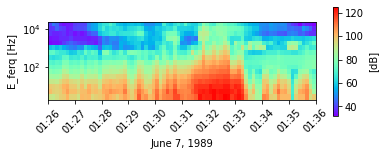

<Figure size 432x288 with 0 Axes>

In [65]:
start_time, end_time = [1, 26, 0], [1, 36, 0] # hour, minute, second

start_time, end_time = (3600*start_time[0] + 60*start_time[1] + start_time[2])//8, (3600*end_time[0] + 60*end_time[1] + end_time[2])//8

epoch = cdf_file.varget('Epoch')
time = cdflib.cdfepoch.breakdown(epoch,False) #list

Intensity_of_Eave = cdf_file.varget('Eave')[start_time:end_time]
Intensity_of_Eave = np.fliplr(Intensity_of_Eave)

for i in range(len(time)):
    time[i].pop()
    time[i] = "/".join(map(str, time[i]))
time_list = [datetime.strptime(x, '%Y/%m/%d/%H/%M/%S') for x in time]
time_list = time_list[start_time:end_time]

channel_list = cdf_file.varget('channel').tolist()

plt.figure()
plt.pcolormesh(time_list, channel_list, np.flipud(Intensity_of_Eave.T), cmap = 'rainbow')
plt.colorbar(label = '[dB]', shrink = 0.5)
plt.yscale('log')
plt.xlabel('June 7, 1989')
plt.ylabel('E_ferq [Hz]')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'), )
plt.xticks(rotation = 45)
plt.gca().set_aspect('0.0005')
plt.show()
plt.savefig('19890607_0126-0136_E_spectrum.png')

In [92]:
cdf_file.varget("channel"), str(3.16e+00)

(array([3.16e+00, 5.62e+00, 1.00e+01, 1.78e+01, 3.16e+01, 5.62e+01,
        1.00e+02, 1.78e+02, 3.16e+02, 5.62e+02, 1.00e+03, 1.78e+03,
        3.16e+03, 5.62e+03, 1.00e+04, 1.78e+04], dtype=float32),
 '3.16')

In [18]:
a = np.arange(0, 12).reshape(3,4)
x = [0, 1, 2, 3]
y = [1, 4, 9, 16]
fig, ax = plt.subplots()
mappable = ax.imshow(a, 
                     extent = [time_lims[0], time_lims[-1],  y_lims[0], y_lims[-1]],
                     aspect='auto',
                     cmap = 'rainbow',
                     interpolation = 'none',
                     filternorm = None)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

viscm not found, falling back on simple display


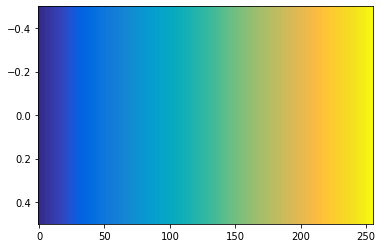

In [78]:

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map
try:
    from viscm import viscm
    viscm(parula_map)
except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                 cmap=parula_map)
plt.show()

In [7]:
a = -2.0
b = a.round()
print(b)

AttributeError: 'float' object has no attribute 'round'